# Analyse de Données et Méthodes d'Ensemble


## Partie 1: Analyse exploratoire des données

En commencant par observer les données , on remarque qu'ils ont pas d'identifiants, commencons par en ajouter une colonne ID pour mieux identifier les valeurs.

### Exercice 1 : Statistiques descriptives 

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
# Chargement du dataset
file_path= './donnees_elevage_poulet.csv'
df= pd.read_csv(file_path)

# Ajoute de la colonne pour identifier chaque poulet

df['id']= range(1,len(df)+1)
     
for coloums in [df['Poids_poulet_g'],df['Nourriture_consommee_g_jour'],df['Temperature_enclos_C']]: 
    nom = coloums.name
    moyenne = coloums.mean()
    mediane = coloums.median()
    ecart_type = coloums.std()
    variance = coloums.var()
    q1 = coloums.quantile(0.25)
    q3 = coloums.quantile(0.75)
    print(" _______________________________________________________________ ")
    print(f"Moyenne de  {nom} : {moyenne}")
    print(f"Médiane de  {nom} : {mediane}")
    print(f"Ecart-type de  {nom} : {ecart_type}")
    print(f"Variance de  {nom} : {variance}")
    print(f"Premier quartile de  {nom} : {q1}")
    print(f"Troisième quartile de  {nom} : {q3}")


 _______________________________________________________________ 
Moyenne de  Poids_poulet_g : 2509.58
Médiane de  Poids_poulet_g : 2481.5
Ecart-type de  Poids_poulet_g : 898.4368746263937
Variance de  Poids_poulet_g : 807188.8176884422
Premier quartile de  Poids_poulet_g : 1810.75
Troisième quartile de  Poids_poulet_g : 3356.5
 _______________________________________________________________ 
Moyenne de  Nourriture_consommee_g_jour : 129.745
Médiane de  Nourriture_consommee_g_jour : 135.5
Ecart-type de  Nourriture_consommee_g_jour : 44.00616648200808
Variance de  Nourriture_consommee_g_jour : 1936.542688442211
Premier quartile de  Nourriture_consommee_g_jour : 95.75
Troisième quartile de  Nourriture_consommee_g_jour : 165.25
 _______________________________________________________________ 
Moyenne de  Temperature_enclos_C : 28.389
Médiane de  Temperature_enclos_C : 28.5
Ecart-type de  Temperature_enclos_C : 2.0657238623245084
Variance de  Temperature_enclos_C : 4.2672150753768845
Premi

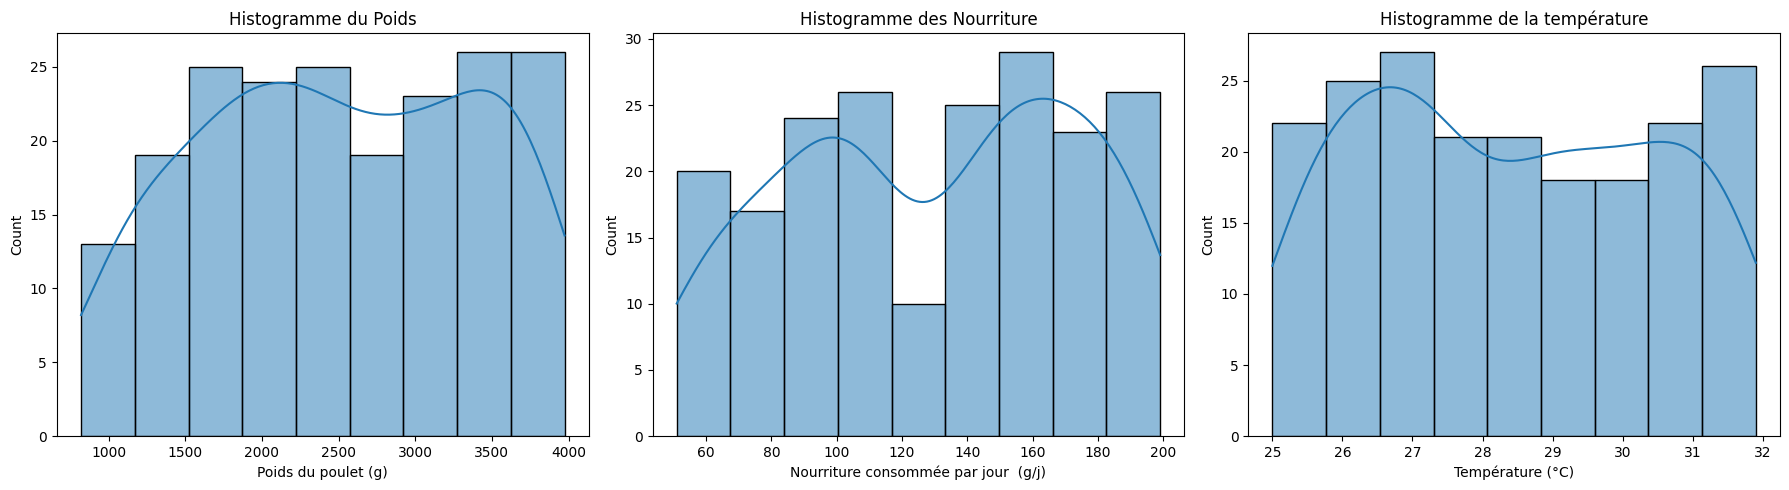

In [167]:
# Création des histogrammes
fig1, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Poids_poulet_g"], kde=True, ax=axes[0])
axes[0].set_title("Histogramme du Poids")
axes[0].set_xlabel("Poids du poulet (g)")

sns.histplot(df["Nourriture_consommee_g_jour"],kde=True, ax=axes[1])
axes[1].set_title("Histogramme des Nourriture")
axes[1].set_xlabel("Nourriture consommée par jour  (g/j)")

sns.histplot(df["Temperature_enclos_C"], kde=True, ax=axes[2])
axes[2].set_title("Histogramme de la température")
axes[2].set_xlabel("Température (°C)")

plt.tight_layout()
plt.show()

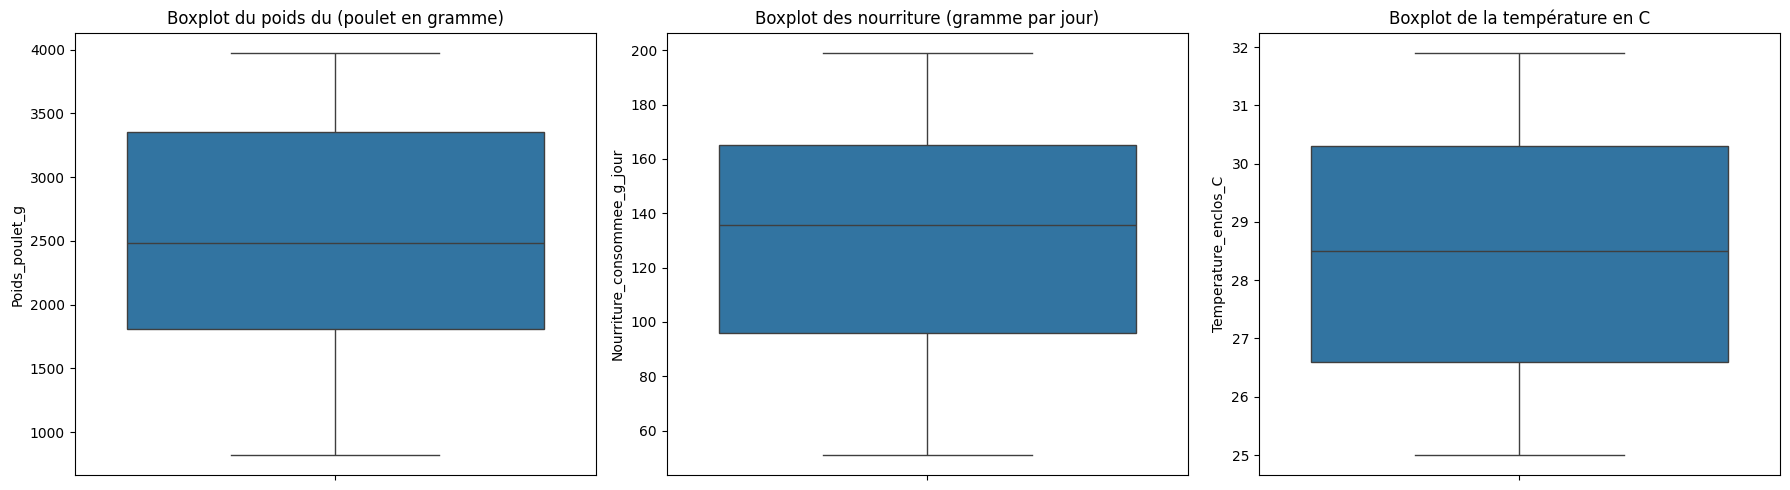

In [168]:
fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["Poids_poulet_g"], ax=axes[0],vert=True)
axes[0].set_title("Boxplot du poids du (poulet en gramme)")

sns.boxplot(y=df["Nourriture_consommee_g_jour"], ax=axes[1])
axes[1].set_title("Boxplot des nourriture (gramme par jour)")

sns.boxplot(y=df["Temperature_enclos_C"], ax=axes[2])
axes[2].set_title("Boxplot de la température en C")

plt.tight_layout()
plt.show()

On observant ces graphiques, on observe que :

- Poids : La plus grande variabilités sur une zone plus large

- Nourriture : variabilité moyenne

- Temperature : le plus homogène des 3 variables, avec très peu de dispersion 

### Exercice 2: Détection des outliners

In [169]:
from scipy.stats import iqr
from scipy import stats

stats.zscore(df)

# Liste des noms de colonnes à analyser
colonnes = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']

for col in colonnes: 
    # Calcul de Q1, Q3 et de l'IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q1-q3    
    
    outliers_iqr = {}

    lower_bound = q1- 0.6 * IQR
    upper_bound = q3 + 0.6 * IQR
    
    # On considère True si la valeur est en-dehors de [lower_bound, upper_bound]
    outliers_iqr = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
    
    print(f"Nombre d'outliers détectés pour {col} par la méthode IQR :")
    print(outliers_iqr.sum())  

Nombre d'outliers détectés pour Poids_poulet_g par la méthode IQR :
200
Nombre d'outliers détectés pour Nourriture_consommee_g_jour par la méthode IQR :
200
Nombre d'outliers détectés pour Temperature_enclos_C par la méthode IQR :
200


In [170]:
#Il est recommandé de standariser les données avant d'appliquer le Z-Score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On crée une copie du DataFrame 
df_standardized = df.copy()
df_standardized[colonnes] = scaler.fit_transform(df[colonnes])

# Calcul des Z-scores pour les variables sélectionnées
z_scores = stats.zscore(df_standardized[colonnes])
threshold = 3

outliers_zscore = (z_scores > threshold)

print("Nombre d'outliers détectés par la méthode Z-Score :")
print(outliers_zscore.sum())

Nombre d'outliers détectés par la méthode Z-Score :
Poids_poulet_g                 0
Nourriture_consommee_g_jour    0
Temperature_enclos_C           0
dtype: int64


### Exercice 3 Tests Paramètriques

In [171]:
# Test de shapiro-Wilk
for col in colonnes: 
    shapiro_test = stats.shapiro(df[col]) 
    
    print(f"Test de normalité de Shapiro-Wilk pour la colonne {col} donne : {shapiro_test}")


Test de normalité de Shapiro-Wilk pour la colonne Poids_poulet_g donne : ShapiroResult(statistic=0.9568220376968384, pvalue=9.097968359128572e-06)
Test de normalité de Shapiro-Wilk pour la colonne Nourriture_consommee_g_jour donne : ShapiroResult(statistic=0.9448697566986084, pvalue=6.229163318494102e-07)
Test de normalité de Shapiro-Wilk pour la colonne Temperature_enclos_C donne : ShapiroResult(statistic=0.9432098269462585, pvalue=4.4061374637749395e-07)


**On teste la normalité des données avec Shapiro-Wilk , si la pvalue vaut moins de 5 % ( seuil courant), les données ne suivent pas une loi normale.
C'est le cas pour toutes les 3 variables ici qui sont inférieur a 5% ainsi ces trois variables ne suivient pas une loi normale**.

#### Test T de Student
Afin de tester si la différence de moyenne entre deux groupes est statistiquement significatives. 
Dans notre cas, on a pas de groupes ( données catégorielles), j'ai decidé de séparer la nourriture consommée par jours en deux catégories car son histogramme présente une montée, uen déscente puis une remontée.

In [172]:
# Nourriture consommée par jour 
# Calcul de la médiane
median_value = df['Nourriture_consommee_g_jour'].median()

# Création d'une nouvelle colonne indiquant le groupe
df['Groupe_nourriture'] = df['Nourriture_consommee_g_jour'].apply(lambda x: 'Faible' if x < median_value else 'Élevée')
nourriture_faible = df[df['Groupe_nourriture'] == 'Faible']['Poids_poulet_g']
nourriture_eleve = df[df['Groupe_nourriture'] == 'Élevée']['Poids_poulet_g']

# Réalisation du test t de Student 
t_stat, p_value = stats.ttest_ind(nourriture_faible, nourriture_eleve, equal_var=False)

print("Résultats du test t de Student pour nourriture:")
print("t-statistic =", t_stat)
print("p-value =", p_value)

Résultats du test t de Student pour nourriture:
t-statistic = 0.5984430643724904
p-value = 0.5502323176593388



En comparant le poids des poulets entre les deux groupes définis par la médiane de la consommation de nourriture, le test t de Student montre qu'il pas différence significative statistiquement dans le poids moyen des poulets entre le groupe "Faible" et le groupe "Élevée" de consommation (p-value > 5%).

-> la consommation de nourriture ne semble pas être un facteur déterminant du poids des poulets.

In [173]:
#### Test d'Anova
# Découpage de la variable de consommation en trois groupes
q33 = df['Nourriture_consommee_g_jour'].quantile(0.33)
q66 = df['Nourriture_consommee_g_jour'].quantile(0.66)

def grouper(x):
    if x < q33:
        return 'Faible'
    elif x < q66:
        return 'Moyenne'
    else:
        return 'Élevée'

df['Groupe_nourriture_3'] = df['Nourriture_consommee_g_jour'].apply(grouper)

# Sélection des poids par groupe
group_faible = df[df['Groupe_nourriture_3'] == 'Faible']['Poids_poulet_g']
group_moyenne = df[df['Groupe_nourriture_3'] == 'Moyenne']['Poids_poulet_g']
group_eleve  = df[df['Groupe_nourriture_3'] == 'Élevée']['Poids_poulet_g']

# Test  ANOVA
f_stat, p_value = stats.f_oneway(group_faible, group_moyenne, group_eleve)
print("Résultats de l'ANOVA :")
print("F-statistic =", f_stat)
print("p-value =", p_value)


Résultats de l'ANOVA :
F-statistic = 0.9378183472827238
p-value = 0.39322158342035995


**P-value > 5% On peut pas rejeter l'hypotèse nulle, c'est à dire qu'il n'y a pas de différence significatives entre les groupes étudiés, cela correspond avec le test t de student**

## Partie 2: Analyse exploratoire des données
### Exercice 4 : Analyse en Composantes Principales (ACP)
La ACP est particulièrement utile dans le contexte de l’apprentissage non supervisé où l’on cherche à comprendre la structure interne des données sans référence à des étiquettes prédéfinies. Les principales étapes impliquées dans la ACP comprennent :

1. **Standardisation des données :** Les données doivent être centrées autour de zéro, et parfois normalisées pour avoir une variance unitaire.

2. **Calcul de la matrice de covariance :** La matrice de covariance montre comment les variables varient ensemble. Dans le cas de PCA, elle aide à comprendre les directions dans lesquelles les données sont dispersées.


3. **Calcul des vecteurs propres et valeurs propres :** Les vecteurs propres de la matrice de covariance indiquent les directions des axes où la variance est maximisée. Les valeurs propres associées indiquent l’importance de chaque axe.

4. **Projection des données :** Les données originales sont projetées dans le nouveau sous-espace formé par les premières composantes principales.


##### Calcul de la matrice de covariance
On a deux méthodes pour calculer la matrice de covariances sur les données
- Soit avec la fonction inclus dans la biblothéque numpy
- Soit manuellement avec la formule de covariance \$\frac{1}{n-1} \mathbf{X}^\top \mathbf{X}
\$

In [174]:
df_acp= pd.read_csv(file_path)

X = df_acp

# Utilisation de StandardScaler de la biblothéque preprocessing pour normaliser les données
scaler= StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
# création d'un dataframe pour faciliter l'utilisation
xs = pd.DataFrame(scaled_X, columns= df_acp.columns)

# rowvar=False : chaque colonne = une variable
cov_matrice_np=np.cov(xs,rowvar=False)

# Affichage des résultats
print("Matrice de covariance via np.cov :\n", cov_matrice_np)


Matrice de covariance via np.cov :
 [[ 1.00502513 -0.08194588  0.01915299  0.07643343 -0.04073578  0.02797066
  -0.1190977  -0.02983038]
 [-0.08194588  1.00502513 -0.18661903 -0.02405565 -0.10737917 -0.06560509
  -0.0453192   0.05806111]
 [ 0.01915299 -0.18661903  1.00502513 -0.02704035 -0.06423386  0.05927977
  -0.0021131   0.09818369]
 [ 0.07643343 -0.02405565 -0.02704035  1.00502513 -0.00174419 -0.010359
   0.02476582  0.05087189]
 [-0.04073578 -0.10737917 -0.06423386 -0.00174419  1.00502513  0.0298505
  -0.03029875  0.06285473]
 [ 0.02797066 -0.06560509  0.05927977 -0.010359    0.0298505   1.00502513
  -0.01496235  0.07228268]
 [-0.1190977  -0.0453192  -0.0021131   0.02476582 -0.03029875 -0.01496235
   1.00502513 -0.09485815]
 [-0.02983038  0.05806111  0.09818369  0.05087189  0.06285473  0.07228268
  -0.09485815  1.00502513]]


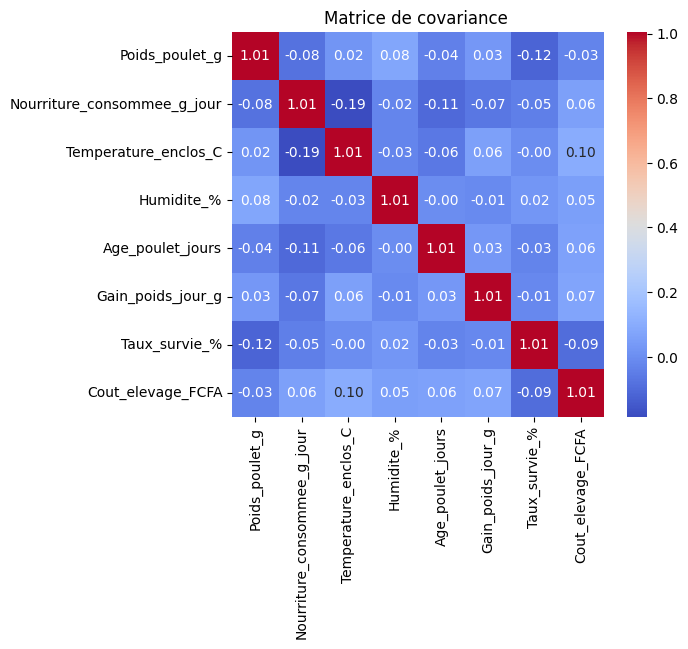

In [175]:
plt.figure(figsize=(6, 5))
sns.heatmap(cov_matrice_np, 
            cmap="coolwarm",          # la palette de couleurs ("coolwarm", "viridis", etc.)
            annot=True,             # affiche la valeur numérique dans chaque case
            fmt=".2f",              # format d'affichage (2 décimales)
            xticklabels=df_acp.columns,  # noms des variables en abscisse
            yticklabels=df_acp.columns   # noms des variables en ordonnée
           )
plt.title("Matrice de covariance ")
plt.show()

##### Calcul des vecteurs propres et Tri des composantes
Il y a plusieurs méthodes afin de calculer les vecteurs propres on va utiliser ici la biblothèque numpy permet directement de calculer les valeurs propres et les vecteurs propres avec la fonction linalg.eig

Ensuite on va trier les valeurs propres et vecteurs propre par ordre décroissant pour repérer les directions de plus grande variance.

In [176]:
# Calcul des vecteurs propres et valeurs propres

# valeurs propres : array de taille d
# vecteurs_propres : matrice de taille (d x d )
# où chaque colonne est un vecteur propres associé à la valeur propre

valeurs_propres, vecteurs_propres = np.linalg.eig(cov_matrice_np)

# Tri des données en ordre décroissant

# On récupère l’ordre pour trier les valeurs propres de la plus grande à la plus petite
idx_ordre = np.argsort(valeurs_propres)[::-1] 

# On réorganise les valeurs propres
valeurs_propres_triees = valeurs_propres[idx_ordre]

# On réorganise les vecteurs propres en conséquence
vecteurs_propres_tries = vecteurs_propres[:, idx_ordre]




Afin de décider du nombre de composantes principales à conserver pour cela on peut:
- On peut visualiser les valeurs propres et chercher le 'coude' de cette courbe
- ou calculer la part de la variance cumulée de chaque composante jusqu'a qu'un certain pourcentage soit attient.

In [177]:
# Calcul du pourcentage de variance expliquée par chaque composante
variance_expliquee = valeurs_propres / np.sum(valeurs_propres)
print("Pourcentage de variance expliquée par chaque composante :", variance_expliquee)


Pourcentage de variance expliquée par chaque composante : [0.08603149 0.09745079 0.15826338 0.11835282 0.1432671  0.13795862
 0.12684165 0.13183415]


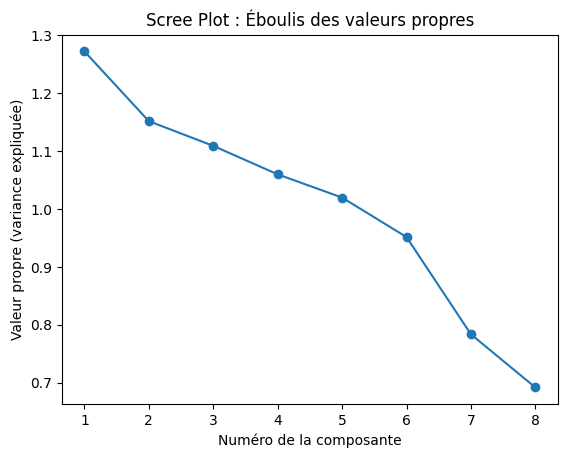

In [178]:
# Méthode du 'coude'
plt.plot(range(1, len(valeurs_propres_triees)+1), valeurs_propres_triees, marker='o')
plt.title("Scree Plot : Éboulis des valeurs propres")
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre (variance expliquée)")
plt.show()

Le coude ici es à 2 composantes principales,
Essayons de projeter les ces deux composantes.

##### Projection des données et visualisation des données sur un espace à deux dimensions.


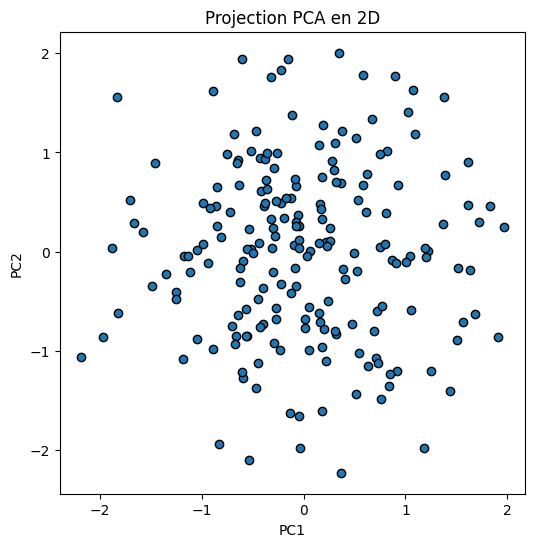

In [179]:
# Selectionner les premieres composantes principales

# Sélection des deux premiers vecteurs propres (correspondant aux deux plus grandes valeurs propres)
Composantes_2 = vecteurs_propres[:,:2]

# Projection des composantes  : chaque point passe de R^d à R^2
x_projection = xs.values @ Composantes_2
# x_projection à maintenant la forme (N,2)

# Visualisation
plt.figure(figsize=(6, 6))
plt.scatter(x_projection[:, 0], x_projection[:, 1], edgecolor='k')
plt.title("Projection PCA en 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Acp classique semblent ne pas être suffisant pour notre problème, on ne voit aucune amélioration par rapport aux données initiales.

### Exercice 5: ACP à noyau


In [180]:
from sklearn.decomposition import KernelPCA

X=scaled_X 

transformer_linear = KernelPCA(n_components=2,kernel='linear')
transformer_rbf = KernelPCA( n_components=2,kernel='rbf')
transformer_poly = KernelPCA( n_components=2,kernel='poly')

X_transformed_linear = transformer_linear.fit_transform(X)
X_transformed_rbf = transformer_rbf.fit_transform(X)
X_transformed_poly = transformer_poly.fit_transform(X)

#X_transformed_linear.shape 
#(200, 8)
#X_transformed_rbf.shape
#(200, 199)
#X_transformed_poly.shape
#(200, 164)

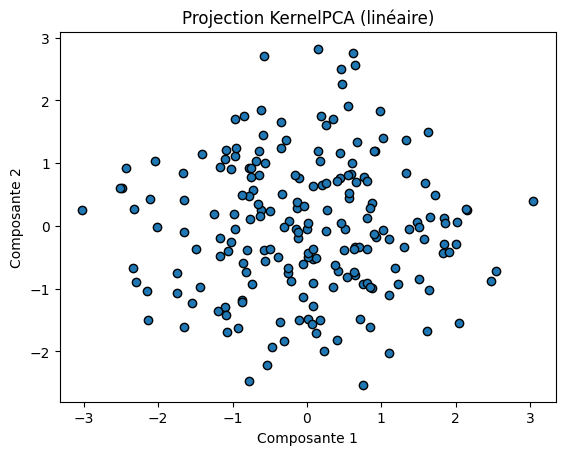

In [181]:
plt.scatter(X_transformed_linear[:, 0], X_transformed_linear[:, 1], edgecolor='k')
plt.title("Projection KernelPCA (linéaire)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

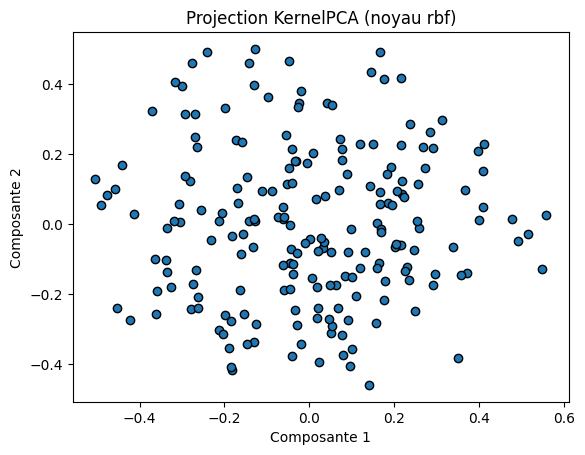

In [182]:
plt.scatter(X_transformed_rbf[:, 0], X_transformed_rbf[:, 1], edgecolor='k')
plt.title("Projection KernelPCA (noyau rbf)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

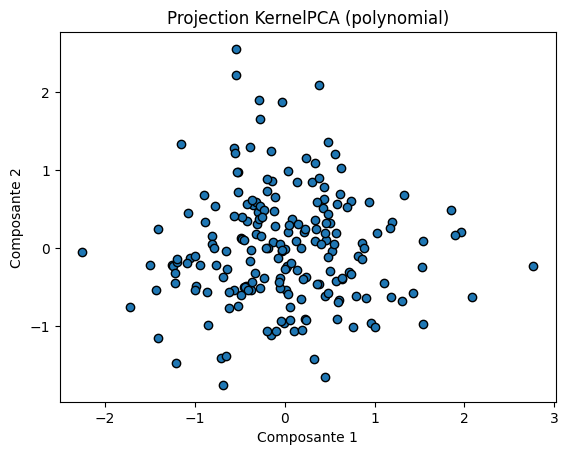

In [183]:
plt.scatter(X_transformed_poly[:, 0], X_transformed_poly[:, 1], edgecolor='k')
plt.title("Projection KernelPCA (polynomial)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

On peut constater que le noyau polynomial à l'air de fonctionner mieux que le reste.
Egalement meilleure que ACP classique.

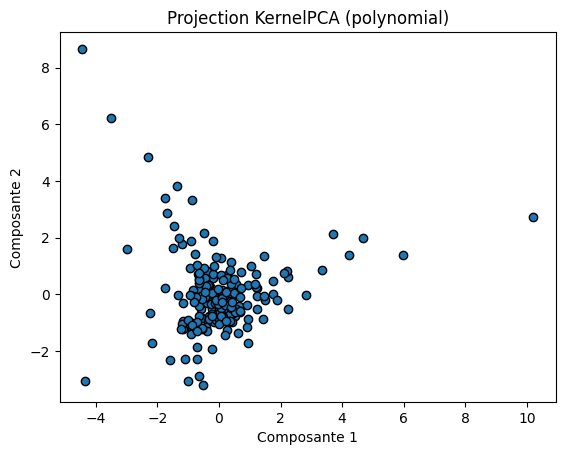

In [184]:
transformer_poly = KernelPCA( n_components=2,kernel='poly',degree=5)
X_transformed_poly = transformer_poly.fit_transform(X)

plt.scatter(X_transformed_poly[:, 0], X_transformed_poly[:, 1], edgecolor='k')
plt.title("Projection KernelPCA (polynomial)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

Les données semblent se converger vers un cluster quand on augumente les degrés de notre ACP polynomial

### Partie 3 : Méthodes d'ensemble
#### Exercice 6 : Bagging


In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

f= pd.read_csv(file_path)

clf = RandomForestClassifier(max_depth=2, random_state=0)
# on transforme en valeurs catégorique car le classifier ne prends pas les valeurs continus. 
#On met 1 si ils ont plus de 90% chance de survie 0 sinon
df['Taux_survie_bool'] = df['Taux_survie_%'].apply(lambda x: 0 if x < 90 else 1)

X = df.drop(['Taux_survie_%', 'Taux_survie_bool'], axis=1)
y= df['Taux_survie_bool'].values

# séparation données entrainement & test 20% de test 80% d'entrainement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrainement du modèle RandomForestClassifier

clf.fit(X_train, y_train)

# prédiction

y_pred = clf.predict(X_test)

# Calcul des métriques

f1 = f1_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("RandomForest MSE:", mean_squared_error(y_test, y_pred))
print("RandomForest R²:", r2_score(y_test, y_pred))

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



ValueError: could not convert string to float: 'Faible'

On obtient un score:
- Accuracy : 0,65 -> le modèle prédit la survie > 90% dans 65% des cas
- F1-Score : 0.67 -> Performance global de notre modèle est de 67%

In [ ]:
# Sélection des variables les plus importantes
feature_importances = clf.feature_importances_
features = X.columns
print(features)

Les variables les plus importantes sont le poids du poulet, la nourriture consommée par jour et la temperature de l'enclos dans l'ordre d'importance.
Ils permettent de prédire le meilleur surive du poulet

#### Exercice 7 : Boosting


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# on peut pas utiliser classification sur adabooost car il supporte pas les multi-models
from sklearn.metrics import mean_squared_error, r2_score
f= pd.read_csv(file_path)

X = df.drop(columns=['Poids_poulet_g'])
y = df['Poids_poulet_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_ada = AdaBoostRegressor(random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)

# Calcul des métriques
print("AdaBoost MSE:", mean_squared_error(y_test, y_pred_ada))
print("AdaBoost R²:", r2_score(y_test, y_pred_ada))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(loss='huber',random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))


Les deux modèles semblent avoir des performances assez mediocre : score négatif, donc les modèles sont peu efficaces.

Adaboost est très sensible aux outliners.
Gradient Boosting est un peu plus robuste mais ici il ne suffit pas même avec une loss fonction comme Huber